In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_1 = pd.read_csv("data/BATADAL_dataset03.csv")
data_2 = pd.read_csv("data/BATADAL_dataset04.csv", delimiter=r",\s{0,1}")
test_data = pd.read_csv("data/BATADAL_test_dataset.csv")

data_1["DATETIME"] = pd.to_datetime(data_1.DATETIME)
data_2["DATETIME"] = pd.to_datetime(data_2.DATETIME)
test_data["DATETIME"] = pd.to_datetime(test_data.DATETIME)

In [3]:
print(data_1.columns)
print(data_1.shape)
print(np.unique(data_1['ATT_FLAG']))
print(np.unique(data_2['ATT_FLAG']))
signals = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']

Index(['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')
(8761, 45)
[0]
[-999    1]


In [6]:
f, (ax1, ax2) = plt.subplots(1,2,figsize =(24, 10))

sns.heatmap(data_1[signals].corr(), square=True, vmin=-1, vmax=1, ax=ax1, cmap='seismic')

sns.heatmap(data_2[signals].loc[data_2['ATT_FLAG' == 1]].corr(), square=True, vmin=-1, vmax=1, ax=ax2, cmap='seismic')

KeyError: False

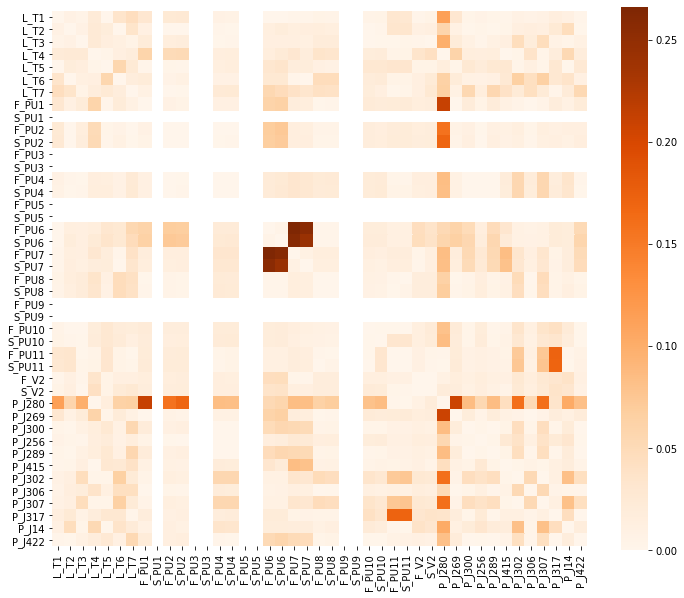

In [5]:
f, (ax1) = plt.subplots(1,1,figsize =(12, 10))
abs_diff_in_corr = np.abs(data_1[signals].corr() - data_2[signals].corr())
sns.heatmap(abs_diff_in_corr, square=True, cmap = 'Oranges')

100% (43 of 43) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Rendering... Please wait


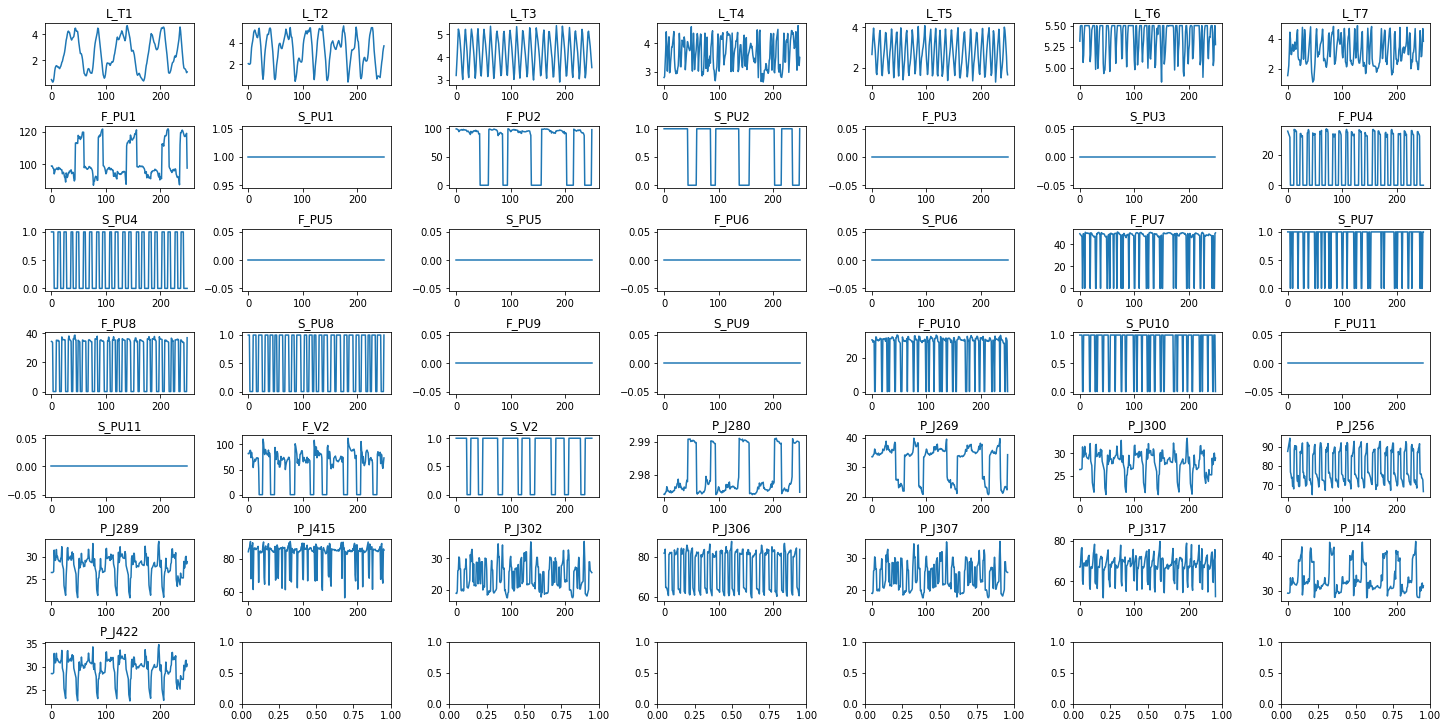

100% (43 of 43) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Rendering... Please wait


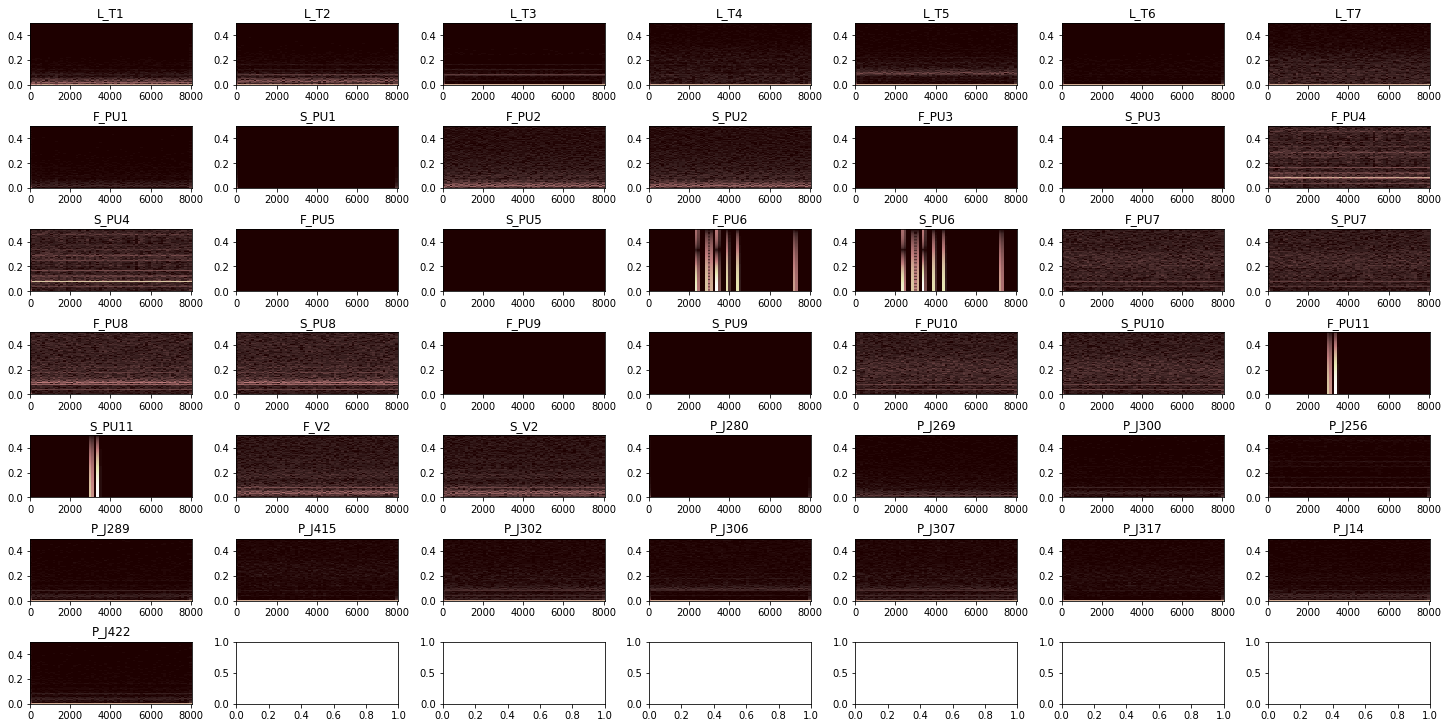

In [6]:
import progressbar
from scipy.signal import stft
signals = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']

fig, axs = plt.subplots(7,7, constrained_layout=True)
fig.set_size_inches((20,10))
for i in progressbar.progressbar(range(len(signals))):
       a,b = (int(i/7), i%7)
       axs[a,b].plot(range(250), data_1[signals[i]][0:250])
       axs[a,b].set_title(signals[i])
print('Rendering... Please wait')
plt.show()

fig, axs = plt.subplots(7,7, constrained_layout=True)
fig.set_size_inches((20,10))
for i in progressbar.progressbar(range(len(signals))):
       a,b = (int(i/7), i%7)
       f, t, Zxx = stft(data_1[signals[i]][0:8000], nperseg=256)
       axs[a,b].pcolormesh(t, f, np.abs(Zxx), cmap='pink')
       axs[a,b].set_title(signals[i])
print('Rendering... Please wait')
plt.show()